In [2]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import glob
import matplotlib.pyplot as plt 
from matplotlib_venn import venn3

PATH =  "/home/jmurga/mkt/201902"
import sys
sys.path.insert(0, PATH + '/scripts/src/')
from mkt_analysis import *

# *Drosophila melanogaster* $\alpha$ values
We do not analyze genes which Pi, P0, Di or D0 are 0

In [3]:
data = PATH + '/results/dsim_dmel_sites_binned.tsv'
dmel_dataset = pd.read_csv(data,sep='\t')
dmel_dataset.head()

,id,pop,daf0f,daf4f,p0,pi,di,d0,chr,startGene,endGene,strand,name,mi,m0,cM_Mb
0,FBgn0000008,RAL,26;4;3;4;1;3;0;0;1;0;0;0;0;0;0;0;0;1;1;0;0;0;0...,18;6;1;4;3;0;3;0;0;0;0;0;0;1;1;0;1;0;0;0;0;1;1...,42,45,27,31,2R,18024473,18060339,+,a,2539,667,2.169284
1,FBgn0000008,ZI,60;7;2;0;1;1;0;3;0;0;0;0;0;0;0;1;0;0;0;0;0;0;1...,43;12;2;5;2;2;1;2;2;0;1;2;1;0;1;3;0;0;1;0;0;0;...,82,76,26,31,2R,18024473,18060339,+,a,2539,667,2.169284
2,FBgn0000014,RAL,2;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;...,1;0;0;0;0;1;0;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;...,4,2,1,20,3R,12632936,12655771,-,abd-A,1153,292,0.761699
3,FBgn0000014,ZI,4;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;...,9;1;0;0;0;0;0;1;0;0;1;0;0;0;0;0;0;0;0;0;0;0;0;...,14,4,1,18,3R,12632936,12655771,-,abd-A,1153,292,0.761699
4,FBgn0000015,RAL,3;0;0;0;0;0;0;0;0;0;0;1;0;0;0;0;0;0;0;0;0;0;0;...,5;0;0;0;1;2;1;0;0;0;0;1;0;0;0;0;0;0;0;0;0;1;0;...,13,4,0,3,3R,12752932,12797958,-,Abd-B,962,232,0.435257


In [4]:
dmel_dataset = dmel_dataset[(dmel_dataset['pi']!=0) & (dmel_dataset['p0']!=0) & (dmel_dataset['di']!=0) & (dmel_dataset['d0']!=0 ) & (dmel_dataset['mi']!=0) & (dmel_dataset['m0']!=0 )]

In [5]:
dmel_gene_list = dmel_dataset.id.unique()

## Zambia

In [5]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    zi_genes, mkt_table_zi,zi_deleterious = mkt_by_gene(df = dmel_dataset, population="ZI",nthreads=20,dofe = PATH + "/raw_data/dofe/")

In [ ]:
grapes_gene_list_to_htcondor(PATH + "/raw_data/dofe/zi","ZI",2000)

In [7]:
zi_grapes,grapes_table,tmp= grapes_output(PATH + "/raw_data/dofe/zi","GammaZero","ZI",20)

In [8]:
df_zi = pd.concat([mkt_table_zi,tmp]).sort_values(['type','test']);df_zi

,test,pop,count,mean,std,ids,type
0,asymp1,ZI,5,0.780841,0.208983,"FBgn0001075,FBgn0013733,FBgn0053196,FBgn008690...",analyzable
1,asymp2,ZI,5,0.744028,0.315308,"FBgn0001075,FBgn0013733,FBgn0053196,FBgn008690...",analyzable
2,emkt1,ZI,8598,-0.374167,1.578367,"FBgn0000008,FBgn0000015,FBgn0000017,FBgn000001...",analyzable
3,emkt2,ZI,7588,-0.375810,1.540333,"FBgn0000008,FBgn0000018,FBgn0000052,FBgn000005...",analyzable
4,fww1,ZI,8598,-0.015485,1.618305,"FBgn0000008,FBgn0000015,FBgn0000017,FBgn000001...",analyzable
5,fww2,ZI,7588,-0.031664,1.663996,"FBgn0000008,FBgn0000018,FBgn0000052,FBgn000005...",analyzable
0,grapes,ZI,120,0.803074,0.253822,"FBgn0029791,FBgn0260780,FBgn0030631,FBgn001373...",analyzable
6,imp1,ZI,8598,-0.015485,1.618302,"FBgn0000008,FBgn0000015,FBgn0000017,FBgn000001...",analyzable
7,imp2,ZI,7588,-0.031665,1.663998,"FBgn0000008,FBgn0000018,FBgn0000052,FBgn000005...",analyzable
8,std,ZI,12069,-0.720568,2.823482,"FBgn0000008,FBgn0000014,FBgn0000015,FBgn000001...",analyzable


In [9]:
mkt_table_zi.to_csv(PATH + "/results/genes/mkt_table_zi.tsv",sep='\t',index=False)

In [10]:
pd.concat([zi_genes,zi_grapes]).to_csv(PATH + "/results/genes/zi_genes.tsv",sep='\t',index=False)

# Human $\alpha$ values
We do not analyze genes which Pi, P0, Di or D0 are 0

In [ ]:
data = PATH + '/results/afr_eur.tsv'
human_dataset = pd.read_csv(data,sep='\t')
human_dataset.head()

In [ ]:
human_dataset = human_dataset[(human_dataset['pi']!=0) & (human_dataset['p0']!=0) & (human_dataset['di']!=0) & (human_dataset['d0']!=0 ) & (human_dataset['mi']!=0) & (human_dataset['m0']!=0)]

## AFR

In [48]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    afr_genes, mkt_table_afr, afr_del = mktByGene(df = human_dataset, population="AFR",nthreads=20,dofe = PATH + "/raw_data/dofe/")

In [ ]:
grapesGeneListToHtcondor(PATH + "/raw_data/dofe/afr","AFR",2000)

In [50]:
afr_grapes,grapes_table = grapesOutput(PATH + "/raw_data/dofe/afr","GammaZero","AFR",7)

In [51]:
dfAfr = pd.concat([mkt_table_afr,grapes_table]).sort_values(['type','test']);dfAfr

,test,pop,count,mean,std,ids,type
0,emkt1,AFR,4567,-1.207641,2.329056,"ENSG00000000457,ENSG00000000460,ENSG0000000097...",analyzable
1,emkt2,AFR,3230,-1.169875,2.303953,"ENSG00000000460,ENSG00000000971,ENSG0000000146...",analyzable
2,fww1,AFR,4567,-0.757080,2.278326,"ENSG00000000457,ENSG00000000460,ENSG0000000097...",analyzable
3,fww2,AFR,3230,-0.678739,2.209507,"ENSG00000000460,ENSG00000000971,ENSG0000000146...",analyzable
0,grapes,AFR,6,0.278850,0.239293,"ENSG00000023839,ENSG00000181143,ENSG0000018556...",analyzable
4,imp1,AFR,4567,-0.757083,2.278326,"ENSG00000000457,ENSG00000000460,ENSG0000000097...",analyzable
5,imp2,AFR,3230,-0.678740,2.209506,"ENSG00000000460,ENSG00000000971,ENSG0000000146...",analyzable
6,std,AFR,13078,-1.688256,3.188452,"ENSG00000000457,ENSG00000000460,ENSG0000000093...",analyzable
0,emkt1,AFR,443,-5.145887,4.393349,"ENSG00000007933,ENSG00000048707,ENSG0000005845...",negative
1,emkt2,AFR,338,-4.863820,4.401769,"ENSG00000007933,ENSG00000058453,ENSG0000006071...",negative


In [71]:
mkt_table_afr.to_csv(PATH + "/results/genes/mkt_table_afr.tsv",sep='\t',index=False)

In [53]:
pd.concat([afr_genes,afr_grapes]).to_csv(PATH + "/results/genes/afr_genes.tsv",sep='\t',index=False)

# Output

## Table to paper

In [7]:
mkt_table_afr = pd.read_csv(PATH + '/results/genes/mkt_table_afr.tsv',sep='\t')
mkt_table_zi = pd.read_csv(PATH + '/results/genes/mkt_table_zi.tsv',sep='\t')

In [8]:
alphas = pd.concat([mkt_table_zi,mkt_table_afr])
alphas = round(alphas,3)
alphas['meanSd'] = alphas['mean'].astype(str) + "±(" + alphas['std'].astype(str) + ")"
alphas['count'] = alphas['count'].astype(str)

In [9]:
tablePaper = alphas.groupby(['pop','type','test']).agg({'meanSd':"".join,'count':"".join}).reset_index()
tablePaper = tablePaper.pivot_table(index=['pop','type'],columns='test',values=['meanSd','count'],aggfunc='first')
tablePaper.fillna(0,inplace=True)
tablePaper

count                                                    \
test           asymp1 asymp2 emkt1 emkt2  fww1  fww2 grapes  imp1  imp2   
pop type                                                                  
AFR analyzable      0      0  4567  3230  4567  3230      6  4567  3230   
    negative        0      0   443   338    28    11      1   349   244   
    positive        0      0    31    21    28    18      5   277   205   
ZI  analyzable      5      5  8598  7588  8598  7588    120  8598  7588   
    negative        0      0   612   586    47    38      3   338   339   
    positive        5      5  1297  1136  1209   929    117  2465  2244   

                              meanSd                                 \
test              std         asymp1         asymp2           emkt1   
pop type                                                              
AFR analyzable  13078              0              0  -1.208±(2.329)   
    negative     1037              0              0  -5.146±(4.393)   
    positive       79              0              0   0.765±(0.169)   
ZI  analyzable  12069  0.781±(0.209)  0.744±(0.315)  -0.374±(1.578)   
    negative     1131              0              0  -3.692±(3.243)   
    positive     1495  0.781±(0.209)  0.744±(0.315)   0.738±(0.127)   

                                                                   \
test                     emkt2             fww1              fww2   
pop type                                                            
AFR analyzable   -1.17±(2.304)   -0.757±(2.278)     -0.679±(2.21)   
    negative    -4.864±(4.402)   -11.752±(6.44)   -12.695±(5.783)   
    positive     0.753±(0.173)    0.873±(0.105)     0.893±(0.093)   
ZI  analyzable   -0.376±(1.54)   -0.015±(1.618)    -0.032±(1.664)   
    negative     -3.526±(3.12)  -10.022±(8.806)  -10.558±(10.472)   
    positive     0.728±(0.129)      0.837±(0.1)     0.844±(0.095)   

                                                                                
test                    grapes            imp1            imp2             std  
pop type                                                                        
AFR analyzable   0.279±(0.239)  -0.757±(2.278)   -0.679±(2.21)  -1.688±(3.188)  
    negative      -0.026±(nan)  -5.794±(4.485)  -5.375±(4.676)  -7.408±(6.323)  
    positive      0.34±(0.209)   0.778±(0.114)   0.759±(0.121)   0.816±(0.116)  
ZI  analyzable   0.803±(0.254)  -0.015±(1.618)  -0.032±(1.664)  -0.721±(2.823)  
    negative    -0.042±(0.042)    -4.883±(4.9)  -4.698±(4.888)  -4.907±(7.044)  
    positive     0.825±(0.217)   0.783±(0.119)   0.775±(0.121)   0.762±(0.135)

In [12]:
tablePaper.to_csv(PATH + "/results/genes/mkt_table_genes.tsv",sep='\t')

## ZI venn diagram

In [10]:
mkt_table_zi = pd.read_csv(PATH + "/results/genes/mkt_table_zi.tsv",sep="\t")

In [9]:
positive_zi = mkt_table_zi[(mkt_table_zi.type=='positive')]

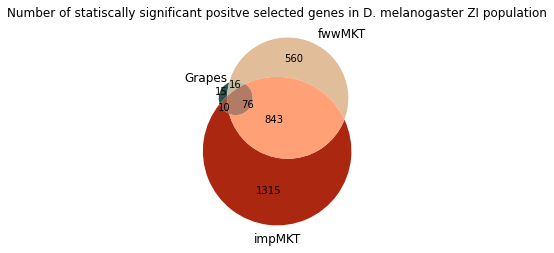

In [17]:
set1 = set(positive_zi[positive_zi.test == 'std'].ids.values[0].split(',')
)
set2 = set(positive_zi[positive_zi.test == 'fww2'].ids.values[0].split(',')
)
set3 = set(positive_zi[positive_zi.test == 'imp2'].ids.values[0].split(',')
)
set4 = set(positive_zi[positive_zi.test == 'grapes'].ids.values[0].split(',')
)
venn3([set4, set2, set3], ('Grapes', 'fwwMKT', 'impMKT'),["#30504f","#e2bd9a","#ab2710",'green'],alpha=1)
plt.title("Number of statiscally significant positve selected genes in D. melanogaster ZI population")
plt.savefig(PATH + "/results/genes/zi_venn.svg")
plt.show()

## AFR venn diagram

In [21]:
mkt_table_afr = pd.read_csv(PATH + "/results/genes/mkt_table_afr.tsv",sep="\t")

In [22]:
positive_afr = mkt_table_afr[(mkt_table_afr.type=='positive')]

In [23]:
positive_afr

,test,pop,count,mean,std,ids,type
16,emkt1,AFR,31,0.765351,0.168667,"ENSG00000117501,ENSG00000143126,ENSG0000011582...",positive
17,emkt2,AFR,21,0.753162,0.173054,"ENSG00000117501,ENSG00000143126,ENSG0000011582...",positive
18,fww1,AFR,28,0.872728,0.105190,"ENSG00000117501,ENSG00000143126,ENSG0000018780...",positive
19,fww2,AFR,18,0.893308,0.092702,"ENSG00000117501,ENSG00000143126,ENSG0000005421...",positive
20,grapes,AFR,5,0.339820,0.209036,"ENSG00000023839,ENSG00000181143,ENSG0000011798...",positive
21,imp1,AFR,277,0.777971,0.113955,"ENSG00000058085,ENSG00000065526,ENSG0000007496...",positive
22,imp2,AFR,205,0.759083,0.120726,"ENSG00000074964,ENSG00000116678,ENSG0000011750...",positive
23,std,AFR,79,0.815835,0.116452,"ENSG00000117399,ENSG00000117501,ENSG0000013158...",positive


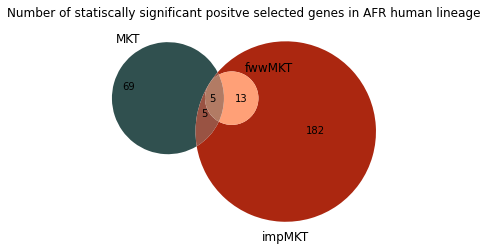

In [31]:
set1 = set(positive_afr[positive_afr.test == 'std'].ids.values[0].split(',')
)
set2 = set(positive_afr[positive_afr.test == 'fww2'].ids.values[0].split(',')
)
set3 = set(positive_afr[positive_afr.test == 'imp2'].ids.values[0].split(',')
)
venn3([set1, set2, set3], ('MKT', 'fwwMKT', 'impMKT'),set_colors=["#30504f","#e2bd9a","#ab2710"],alpha=1)

plt.title("Number of statiscally significant positve selected genes in AFR human lineage")
plt.savefig(PATH + "/results/genes/afr_venn.svg")
plt.show()